In [7]:
import pickle
available = pickle.load( open( "charactersAvailable.p", "rb" ) )

In [8]:
available['epmarugo.ttf']

['ぁ',
 'あ',
 'ぃ',
 'い',
 'ぅ',
 'う',
 'ぇ',
 'え',
 'ぉ',
 'お',
 'か',
 'が',
 'き',
 'ぎ',
 'く',
 'ぐ',
 'け',
 'げ',
 'こ',
 'ご',
 'さ',
 'ざ',
 'し',
 'じ',
 'す',
 'ず',
 'せ',
 'ぜ',
 'そ',
 'ぞ',
 'た',
 'だ',
 'ち',
 'ぢ',
 'っ',
 'つ',
 'づ',
 'て',
 'で',
 'と',
 'ど',
 'な',
 'に',
 'ぬ',
 'ね',
 'の',
 'は',
 'ば',
 'ぱ',
 'ひ',
 'び',
 'ぴ',
 'ふ',
 'ぶ',
 'ぷ',
 'へ',
 'べ',
 'ぺ',
 'ほ',
 'ぼ',
 'ぽ',
 'ま',
 'み',
 'む',
 'め',
 'も',
 'ゃ',
 'や',
 'ゅ',
 'ゆ',
 'ょ',
 'よ',
 'ら',
 'り',
 'る',
 'れ',
 'ろ',
 'ゎ',
 'わ',
 'ゐ',
 'ゑ',
 'を',
 'ん',
 '゛',
 '゜',
 'ゝ',
 'ゞ',
 'ァ',
 'ア',
 'ィ',
 'イ',
 'ゥ',
 'ウ',
 'ェ',
 'エ',
 'ォ',
 'オ',
 'カ',
 'ガ',
 'キ',
 'ギ',
 'ク',
 'グ',
 'ケ',
 'ゲ',
 'コ',
 'ゴ',
 'サ',
 'ザ',
 'シ',
 'ジ',
 'ス',
 'ズ',
 'セ',
 'ゼ',
 'ソ',
 'ゾ',
 'タ',
 'ダ',
 'チ',
 'ヂ',
 'ッ',
 'ツ',
 'ヅ',
 'テ',
 'デ',
 'ト',
 'ド',
 'ナ',
 'ニ',
 'ヌ',
 'ネ',
 'ノ',
 'ハ',
 'バ',
 'パ',
 'ヒ',
 'ビ',
 'ピ',
 'フ',
 'ブ',
 'プ',
 'ヘ',
 'ベ',
 'ペ',
 'ホ',
 'ボ',
 'ポ',
 'マ',
 'ミ',
 'ム',
 'メ',
 'モ',
 'ャ',
 'ヤ',
 'ュ',
 'ユ',
 'ョ',
 'ヨ',
 'ラ',
 'リ',
 'ル',
 'レ',
 'ロ',
 'ヮ',
 'ワ',
 'ヰ'

In [4]:
import matplotlib.pyplot as plt
plt.ion()

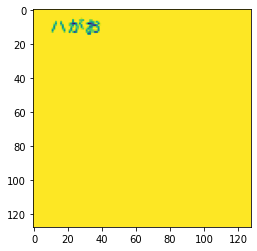

In [15]:
from PIL import Image, ImageFont, ImageDraw

image = Image.new('L', (128, 128), "white" )
draw = ImageDraw.Draw(image)

font = ImageFont.truetype("/home/data/japanese/Fonts/epmarugo.ttf", 10)
draw.text((10, 5), "ハがお", font=font)
plt.imshow( image )

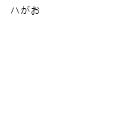

In [16]:
image

In [ ]:
class JapaneseCharacterDataset(Dataset):
    """Japanese Character dataset."""

    def __init__(self, characters_available, root_dir, transform=None):
        """
        Args:
            characters_available (Dict): Dictionary of characters available per font.
            root_dir (string): Directory with all the fonts.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.characters_available = characters_available
        self.root_dir = root_dir
        self.transform = transform
        
        length = sum( [len(available) for available in characters_available.values()] )

    def __len__(self):
        return length*10 # expand dataset tenfold

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:].as_matrix()
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample